### DEMAND PLANNING

Loading Libraries:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('orders_by_product.csv')
print(df.shape)
df.head(3)

(74061, 13)


,date,fullVisitorId,visitId,transactionId,productSKU,v2ProductName,v2ProductCategory,productVariant,productBrand,productRevenue,productPrice,localProductPrice,productQuantity
0,20170420,2.132210e+18,1492694669,ORD201704202210,GGOEGGOA017399,Maze Pen,Office,Single Option Only,(not set),0.895263,0.79,0.79,1.0
1,20170304,7.053040e+17,1488652808,ORD201703041500,GGOEGGOA017399,Maze Pen,Office,Single Option Only,(not set),0.990000,0.79,0.79,1.0
2,20160820,1.731430e+17,1471752267,ORD20160820922,GGOEGOAC021799,Ballpoint Pen Blue,(not set),Single Option Only,(not set),1.075714,0.79,0.79,1.0


In [3]:
df=df[df.productRevenue>0]
df.replace('(not set)', np.nan, inplace=True)
df.replace("${productitem.product.origCatName}", np.nan, inplace=True)
print(df.shape)
df.head(3)

(36632, 13)


,date,fullVisitorId,visitId,transactionId,productSKU,v2ProductName,v2ProductCategory,productVariant,productBrand,productRevenue,productPrice,localProductPrice,productQuantity
0,20170420,2.132210e+18,1492694669,ORD201704202210,GGOEGGOA017399,Maze Pen,Office,Single Option Only,NaN,0.895263,0.79,0.79,1.0
1,20170304,7.053040e+17,1488652808,ORD201703041500,GGOEGGOA017399,Maze Pen,Office,Single Option Only,NaN,0.990000,0.79,0.79,1.0
2,20160820,1.731430e+17,1471752267,ORD20160820922,GGOEGOAC021799,Ballpoint Pen Blue,NaN,Single Option Only,NaN,1.075714,0.79,0.79,1.0


In [4]:
df = df[['date','productSKU','v2ProductName','v2ProductCategory','productRevenue','productQuantity', 'transactionId']]
df.columns = ['date','sku','name','category','revenue','quantity', 'transactionId']
df.head(3)

,date,sku,name,category,revenue,quantity,transactionId
0,20170420,GGOEGGOA017399,Maze Pen,Office,0.895263,1.0,ORD201704202210
1,20170304,GGOEGGOA017399,Maze Pen,Office,0.990000,1.0,ORD201703041500
2,20160820,GGOEGOAC021799,Ballpoint Pen Blue,NaN,1.075714,1.0,ORD20160820922


In [5]:
np.sum(df.isna())

date                0
sku                 0
name                0
category         8385
revenue             0
quantity            0
transactionId       0
dtype: int64

In [6]:
df[['name','quantity']][df.category.isna()].sort_values('quantity', ascending=False)

,name,quantity
36583,Galaxy Screen Cleaning Cloth,850.0
36445,Maze Pen,700.0
36180,Ballpoint Pen Blue,500.0
36588,Google Metallic Notebook Set,400.0
36131,Color Changing Grip Pen,300.0
36401,Galaxy Screen Cleaning Cloth,300.0
36402,1 oz Hand Sanitizer,300.0
36046,Recycled Mouse Pad,270.0
35850,Maze Pen,270.0
36539,Google Metallic Notebook Set,250.0


In [7]:
temp=df[['name','category','quantity']][df.name.str.contains("Packing Cubes")]
temp=temp.groupby(['name','category']).agg(sum)
temp.reset_index(inplace=True)
temp[~temp.category.isna()]

,name,category,quantity


In [8]:
df['category'] = np.where(df.name.str.contains(" Polo "),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Lunch Kit"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Cable Organizer"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Sweatshirt"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("PowerKit"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Raglan"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Packing Cubes"),'Lifestyle',df['category'])

df['category'] = np.where(df.name.str.contains("Bib"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Headphones"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains(" Cap"),'Headwear',df['category'])
df['category'] = np.where(df.name.str.contains("Gift Card"),'Gift Cards',df['category'])
df['category'] = np.where(df.name.str.contains("Henley"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Pewter"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Vest"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Infant Zip"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Zip Hood"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Highlighter Pen"),'Office',df['category'])

df['category'] = np.where(df.name.str.contains("Seat Pack Organizer"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Tank"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Dog"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Long Sleeve"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Heather Cap"),'Headwear',df['category'])
df['category'] = np.where(df.name.str.contains("Shirt"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains(" Sleeve "),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Jacket"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Pet"),'Lifestyle',df['category'])

df['category'] = np.where(df.name.str.contains("Contigo Addison"),'Drinkware',df['category'])
df['category'] = np.where(df.name.str.contains("Roller Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Stylus"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Balm"),'Housewares',df['category'])
df['category'] = np.where(df.name.str.contains("Charger"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Accessory Pouch"),'Bags',df['category'])
df['category'] = np.where(df.name.str.contains("Joy Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Umbrella"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Travel Pouch"),'Bags',df['category'])
df['category'] = np.where(df.name.str.contains("Onesie"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Luggage Tag"),'Accessories',df['category'])
df['category'] = np.where(df.name.str.contains("Performance Pullover"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Rucksack"),'Backpacks',df['category'])
df['category'] = np.where(df.name.str.contains("Roller Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Gel Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Ball Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Beach Mat"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("T-Shirt"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Dress"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Zip Pullover"),'Apparel',df['category'])


df['category'] = np.where(df.name.str.contains("Baby Esssentials"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Yoga"),'Lifestyle',df['category'])


df['category'] = np.where(df.name.str.contains("Cloth"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Maze Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Ballpoint Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Notebook"),'Notebooks & Journals',df['category'])
df['category'] = np.where(df.name.str.contains("Grip Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Hand Sanitizer"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Mouse Pad"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Stick Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Sticker"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Decal"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Bottle"),'Drinkware',df['category'])
df['category'] = np.where(df.name.str.contains(" Can "),'Drinkware',df['category'])
df['category'] = np.where(df.name.str.contains("Flashlight"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Bag"),'Bags',df['category'])
df['category'] = np.where(df.name.str.contains("Crayon"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Badge Holder"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Cups"),'Drinkware',df['category'])
df['category'] = np.where(df.name.str.contains("Tote"),'Bags',df['category'])
df['category'] = np.where(df.name.str.contains("Shopper"),'Bags',df['category'])

df['category'] = np.where(df.name.str.contains("Twill Cap"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Retractable Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Journal"),'Notebooks & Journals',df['category'])
df['category'] = np.where(df.name.str.contains("Mug"),'Drinkware',df['category'])
df['category'] = np.where(df.name.str.contains("Pencil"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Kick Ball"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Frisbee"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Hoodie"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Hat"),'Headwear',df['category'])
df['category'] = np.where(df.name.str.contains("Light Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Short Sleeve"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Phone Holder"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Device Holder"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Sunglasses"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Tumbler"),'Drinkware',df['category'])
df['category'] = np.where(df.name.str.contains("Device Stand"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Tee"),'Apparel',df['category'])
df['category'] = np.where(df.name.str.contains("Earbud"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("RT Pen"),'Office',df['category'])
df['category'] = np.where(df.name.str.contains("Power Bank"),'Electronics',df['category'])
df['category'] = np.where(df.name.str.contains("Windup"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Backpack"),'Backpacks',df['category'])
df['category'] = np.where(df.name.str.contains("Suitcase"),'Bags',df['category'])
df['category'] = np.where(df.name.str.contains("Selfie"),'Lifestyle',df['category'])
df['category'] = np.where(df.name.str.contains("Speaker"),'Electronics',df['category'])

df['category'] = np.where(df.name.str.contains("Waze"),'Waze',df['category'])

df['category'] = np.where(df.category.str.contains("More Bags"),'Bags',df['category'])

In [9]:
df.category.unique()

array(['Office', 'Lifestyle', 'Electronics', 'Drinkware', 'Waze',
       'Housewares', 'Bags', 'Notebooks & Journals', 'Apparel',
       'Accessories', 'Headwear', 'Gift Cards', 'Backpacks'], dtype=object)

In [10]:
df['date']=pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')

In [11]:
print("Starting Date:",df.date.min())
print("Finish Date:",df.date.max())

Starting Date: 2016-08-01 00:00:00
Finish Date: 2017-07-31 00:00:00


***

### Luana

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import calendar
from matplotlib.ticker import EngFormatter

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

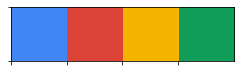

In [13]:
blueg = '#4285F4'
redg = '#DB4437'
yellowg = '#F4B400'
greeng = '#0F9D58'
google_color = [blueg, redg, yellowg, greeng]
sns.palplot(sns.color_palette(google_color))

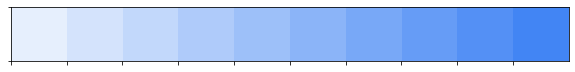

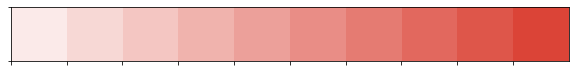

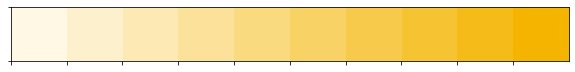

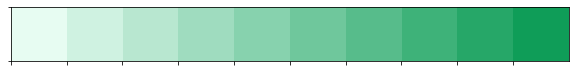

In [14]:
sns.palplot(sns.light_palette(blueg, 10))
sns.palplot(sns.light_palette(redg, 10))
sns.palplot(sns.light_palette(yellowg, 10))
sns.palplot(sns.light_palette(greeng, 10))

In [15]:
df.head()

,date,sku,name,category,revenue,quantity,transactionId
0,2017-04-20,GGOEGGOA017399,Maze Pen,Office,0.895263,1.0,ORD201704202210
1,2017-03-04,GGOEGGOA017399,Maze Pen,Office,0.990000,1.0,ORD201703041500
2,2016-08-20,GGOEGOAC021799,Ballpoint Pen Blue,Office,1.075714,1.0,ORD20160820922
3,2017-06-18,GGOEGGOA017399,Maze Pen,Office,1.123333,1.0,ORD201706181559
4,2017-06-18,GGOEGOAC021799,Ballpoint Pen Blue,Office,1.123333,1.0,ORD201706181559


### Product

In [16]:
products = df[['name','quantity', 'revenue']].groupby('name').agg({'quantity': 'sum', 'revenue': 'sum'})

In [17]:
len(products.reset_index().name.unique().tolist())

490

In [18]:
TopProducts = products.sort_values('quantity', ascending=False).reset_index().head(5)
TopProducts

,name,quantity,revenue
0,Maze Pen,16618.0,15604.003029
1,Google 22 oz Water Bottle,15203.0,42986.744724
2,Google Sunglasses,10949.0,35387.831397
3,Recycled Paper Journal Set,7800.0,27918.170430
4,Ballpoint Pen Blue,6512.0,6152.339575


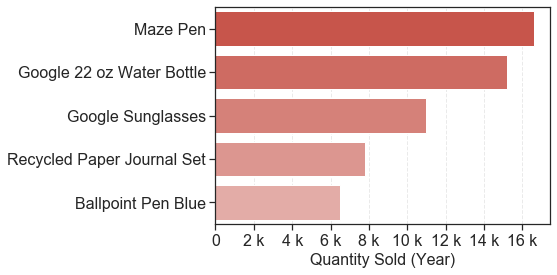

In [19]:
bars = TopProducts.name
y_pos = np.arange(len(bars))

plt.figure(figsize = (6, 4))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = TopProducts.quantity, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 8, reverse=True))
plt.yticks(y_pos, bars, size = 16)
plt.xticks(size = 16)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Quantity Sold (Year)', size = 16)
plt.ylabel('', size = 16)
ax.xaxis.set_major_formatter(EngFormatter())
plt.show()

In [20]:
TopRevenue = products.sort_values('revenue', ascending=False).reset_index().head(5)
TopRevenue

,name,quantity,revenue
0,Google Men's Zip Hoodie,942.0,47539.964333
1,26 oz Double Wall Insulated Bottle,2051.0,43991.441052
2,Google 22 oz Water Bottle,15203.0,42986.744724
3,Leatherette Journal,4057.0,38554.517656
4,Google Sunglasses,10949.0,35387.831397


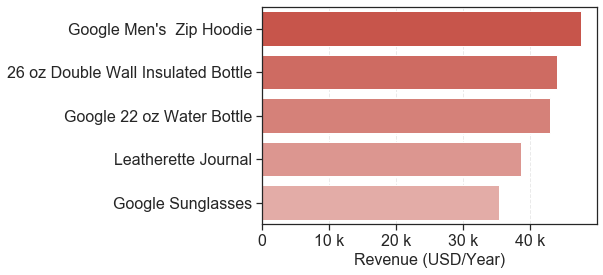

In [21]:
bars = TopRevenue.name
y_pos = np.arange(len(bars))

plt.figure(figsize = (6, 4))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = TopRevenue.revenue, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 8, reverse=True))
plt.yticks(y_pos, bars, size = 16)
plt.xticks(size = 16)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Revenue (USD/Year)', size = 16)
plt.ylabel('', size = 16)
ax.xaxis.set_major_formatter(EngFormatter())
plt.show()

In [22]:
Price = products
Price['Price'] = Price.revenue/Price.quantity
Price = Price.sort_values('Price', ascending = False).reset_index()
TopPrice = Price.head(5)
BottomPrice = Price.tail(5)

In [23]:
TopPrice

,name,quantity,revenue,Price
0,Gift Card - $250.00,4.0,1020.500000,255.125000
1,Google G Noise-reducing Bluetooth Headphones,40.0,5402.437178,135.060929
2,Google Women's Zip Hoodie Grey,10.0,1162.307142,116.230714
3,Gift Card- $100.00,26.0,2758.333333,106.089744
4,Google Women's Insulated Thermal Vest Navy,12.0,1249.196665,104.099722


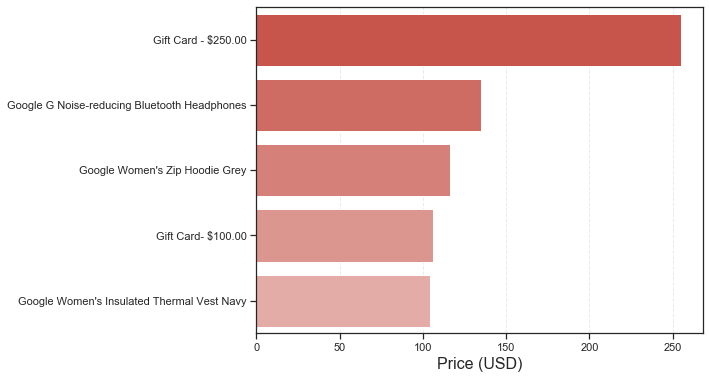

In [24]:
bars = TopPrice.name
y_pos = np.arange(len(bars))

plt.figure(figsize = (8, 6))
sns.set(style="ticks", color_codes=True)
sns.barplot(x = TopPrice.Price, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 8, reverse=True))
plt.yticks(y_pos, bars)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Price (USD)', size = 16)
plt.ylabel('', size = 16)
plt.show()

In [25]:
BottomPrice

,name,quantity,revenue,Price
485,Retractable Ballpoint Pen Red,2252.0,2723.463728,1.209353
486,PaperMate Ink Joy Retractable Pen,275.0,321.067459,1.167518
487,Ballpoint Pen Blue,6512.0,6152.339575,0.944770
488,Maze Pen,16618.0,15604.003029,0.938982
489,PaperMate Ink Joy RT Pen,82.0,76.407777,0.931802


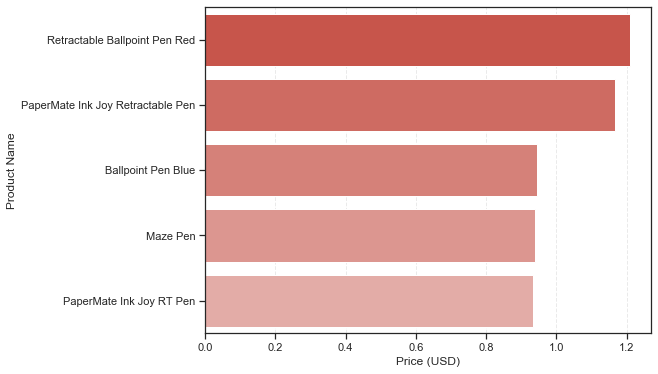

In [26]:
bars = BottomPrice.name
y_pos = np.arange(len(bars))

plt.figure(figsize = (8, 6))
sns.set(style="ticks", color_codes=True)
sns.barplot(x = BottomPrice.Price, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 8, reverse=True))
plt.yticks(y_pos, bars)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.show()

### Category

In [27]:
category = df[['name', 'category', 'quantity', 'revenue']].groupby('category').agg({'quantity': 'sum', 'revenue': 'sum'})

In [28]:
category

,quantity,revenue
category,,
Accessories,876.0,7171.867154
Apparel,28160.0,635476.419143
Backpacks,958.0,74878.531054
Bags,15055.0,103678.492579
Drinkware,38138.0,254163.544521
Electronics,12254.0,129714.198234
Gift Cards,259.0,11289.499958
Headwear,1857.0,35767.040012
Housewares,2330.0,4841.684951


In [29]:
TopCategoryQuantity = category.sort_values('quantity', ascending=False).reset_index()
TopCategoryQuantity

,category,quantity,revenue
0,Office,74764.0,153002.306944
1,Drinkware,38138.0,254163.544521
2,Notebooks & Journals,33820.0,232886.534615
3,Apparel,28160.0,635476.419143
4,Lifestyle,26013.0,85966.772473
5,Bags,15055.0,103678.492579
6,Electronics,12254.0,129714.198234
7,Housewares,2330.0,4841.684951
8,Headwear,1857.0,35767.040012
9,Backpacks,958.0,74878.531054


In [30]:
TopCategoryRevenue = category.sort_values('revenue', ascending=False).reset_index()
TopCategoryRevenue

,category,quantity,revenue
0,Apparel,28160.0,635476.419143
1,Drinkware,38138.0,254163.544521
2,Notebooks & Journals,33820.0,232886.534615
3,Office,74764.0,153002.306944
4,Electronics,12254.0,129714.198234
5,Bags,15055.0,103678.492579
6,Lifestyle,26013.0,85966.772473
7,Backpacks,958.0,74878.531054
8,Headwear,1857.0,35767.040012
9,Gift Cards,259.0,11289.499958


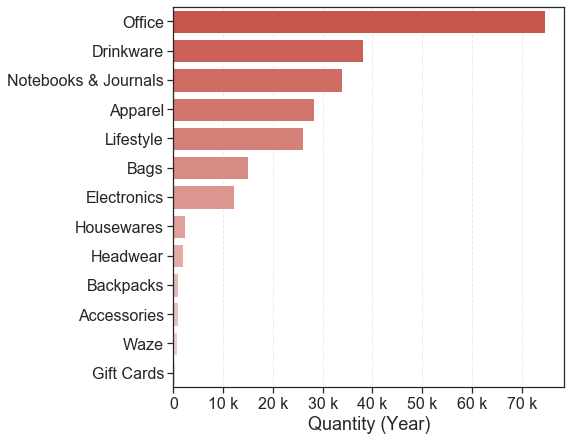

In [31]:
bars = TopCategoryQuantity.category
y_pos = np.arange(len(bars))

plt.figure(figsize = (7, 7))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = TopCategoryQuantity.quantity, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 15, reverse=True))
plt.yticks(y_pos, bars, size = 16)
plt.xticks(size = 16)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Quantity (Year)', size = 18)
plt.ylabel('', size = 18)
ax.xaxis.set_major_formatter(EngFormatter())
plt.show()

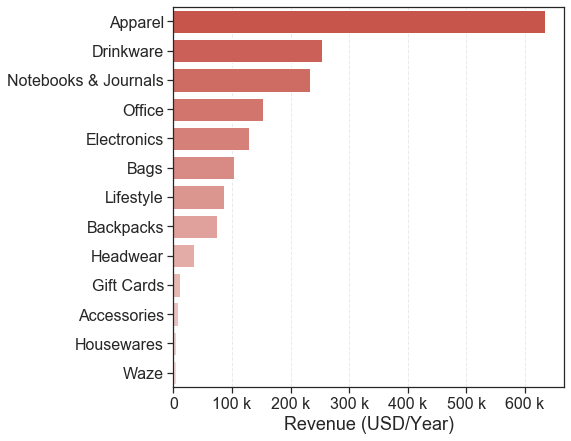

In [32]:
bars = TopCategoryRevenue.category
y_pos = np.arange(len(bars))

plt.figure(figsize = (7, 7))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = TopCategoryRevenue.revenue, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 15, reverse=True))
plt.yticks(y_pos, bars, size = 16)
plt.xticks(size = 16)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Revenue (USD/Year)', size = 18)
plt.ylabel('', size = 18)
ax.xaxis.set_major_formatter(EngFormatter())
plt.show()

### Revenue

In [33]:
df.revenue.sum()

1733144.974242

In [34]:
revenue = df[['date', 'name','quantity', 'revenue']].groupby('date').agg({'quantity': 'sum',
                                                                          'revenue': 'sum'}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


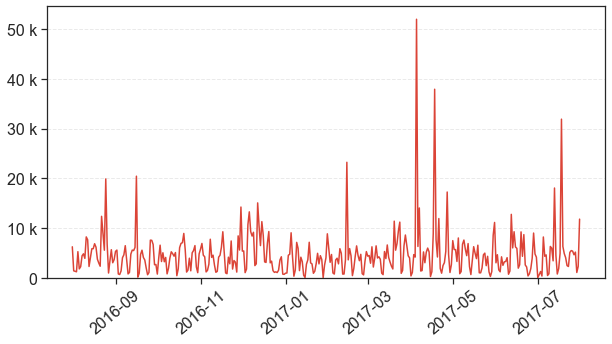

In [35]:
plt.figure(figsize = (10, 5))
sns.set(style="ticks", color_codes=True)
ax = sns.lineplot( 'date', 'revenue', data = revenue, color = redg)
plt.yticks(size = 16)
plt.ylim(0, None)
plt.xticks(size = 16, rotation = 40)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
plt.xlabel('', size = 16)
plt.ylabel('', size = 14)
#plt.ylabel('Total Revenue (USD/day)', size = 14)
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

In [36]:
revenueMonth = df[['date', 'name','quantity', 'revenue']]
revenueMonth = revenueMonth.groupby('date').agg({'revenue': 'sum'}).reset_index()
revenueMonth['Month'] = revenueMonth.date.dt.month
revenueMonth.head()


,date,revenue,Month
0,2016-08-01,6288.059980,8
1,2016-08-02,1467.949978,8
2,2016-08-04,1274.889997,8
3,2016-08-05,5307.009984,8
4,2016-08-06,1856.539983,8


In [37]:
revenueMonth = revenueMonth.groupby('Month').agg({'revenue': 'mean'}).reset_index()
revenueMonth.head()

,Month,revenue
0,1,3429.682249
1,2,4153.512132
2,3,4827.183856
3,4,7429.832652
4,5,4394.580628


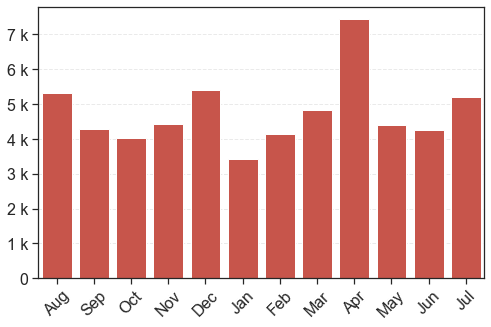

In [38]:
plt.figure(figsize = (8, 5))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = revenueMonth.Month, y = revenueMonth.revenue, orient = 'v',
                 #palette = sns.light_palette(redg, 15, reverse=True),
                 color = redg,
                 order=[8,9,10,11,12,1,2,3,4,5,6,7])
plt.yticks(size = 16)
plt.xticks(np.arange(12), (list(calendar.month_abbr[8:13]) + list(calendar.month_abbr[1:8])) , size = 16, rotation = 45)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
plt.xlabel('', size = 16)
plt.ylabel('', size = 16)
#plt.ylabel('Avg. Revenue (USD/month)', size = 16)
#plt.yticks(ax.get_yticks(), ax.get_yticks() / 1000)
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

### Cross-Selling

In [39]:
crossSelling = df[['date','name','quantity', 'revenue', 'transactionId']]
crossSelling.name.unique()

array(['Maze Pen', 'Ballpoint Pen Blue', '7&quot; Dog Frisbee',
       'Keyboard DOT Sticker', 'Color Changing Grip Pen',
       'Recycled Mouse Pad', 'Retractable Ballpoint Pen Red',
       'Foam Can and Bottle Cooler', 'Rainbow Stylus Pen',
       'Google Kick Ball', 'Google Laptop and Cell Phone Stickers',
       '8 pc Android Sticker Sheet', 'Switch Tone Color Crayon Pen',
       'YouTube Custom Decals', 'Badge Holder',
       'Waze Mood Ninja Window Decal', '1 oz Hand Sanitizer',
       'Waze Mood Original Window Decal', 'Koozie Can Kooler',
       'Galaxy Screen Cleaning Cloth', 'Google Ballpoint Pen Black',
       'Waze Mood Happy Window Decal', 'Google Pet Feeding Mat',
       '8pc Android Sticker Sheet', 'PaperMate Ink Joy Pen',
       'YouTube Sticker Sheet', 'Ballpoint LED Light Pen',
       'PaperMate Ink Joy Retractable Pen', 'Screen Cleaning Cloth',
       'Pop-a-Point Crayon', '22 oz Android Bottle',
       'Android Sticker Sheet Ultra Removable', 'Colored Pencil Set',
 

In [40]:
pd.options.mode.chained_assignment = None

crossSelling['name2'] = ''

crossSelling['name2'] = np.where(crossSelling.name.str.contains("Pen"), 'Pen', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Crayon"), 'Crayon', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Journal"), 'Journal', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Notebook"), 'Notebook', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Sticker"), 'Sticker', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Decal"), 'Decal', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Gift Card"), 'Gift Card', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Mouse Pad"), 'Mouse Pad', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Badge"), 'Badge Holder', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Screen Cleaning Cloth"), 'Screen Cleaning Cloth', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Device Stand"), 'Device Stand/Holder', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Device Holder"), 'Device Stand/Holder', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Phone Holder"), 'Device Stand/Holder', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Phone)(?=.*Mount)'), "Device Stand/Holder", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Earbud"), 'Earbud', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Speaker"), 'Speaker', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Headphones"), 'Headphones', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Selfie Stick"), 'Selfie Stick', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Phone Sanitizer"), 'Phone Sanitizer', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Power Bank"), 'Power Bank', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Charger"), 'Charger', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("PowerKit"), 'PowerKit', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Cooler"), 'Cooler', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Kooler"), 'Cooler', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Bottle"), 'Water Bottle', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Contigo Addison"), 'Water Bottle', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Tumbler"), 'Tumbler', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Mug"), 'Mug', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Cups-Sets"), 'Cups-Sets', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Hand Sanitizer"), 'Hand Sanitizer', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Lip Balm"), 'Lip Balm', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Pet Feeding Mat"), 'Pet Feeding Mat', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Pet Bowl"), 'Pet Bowl', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Dog Toy"), 'Dog Toy', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Dog Frisbee"), 'Dog Frisbee', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Shopping Bag"), 'Shopping Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Shopper"), 'Shopping Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Sport Bag"), 'Sport Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Sports Bag"), 'Sport Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Backpack"), 'Backpack', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Rucksack"), 'Rucksack', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Tote Bag"), 'Tote Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Gear Bag"), 'Gear Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Duffel"), 'Duffel', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Travel Bag"), 'Travel Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Pouch"), 'Pouch', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Lunch"), 'Lunch Bag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Tote"), 'Tote', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*UpCycled)(?=.*Bag)'), "Baby Set", crossSelling['name2'])



crossSelling['name2'] = np.where(crossSelling.name.str.contains("Luggage Tag"), 'Luggage Tag', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Flashlight"), 'Flashlight', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Windup"), 'Windup', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Kick Ball"), 'Kick Ball', crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Baseball Raglan"), 'Baseball Raglan', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Hoodie"), 'Hoodie', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Adult Tee"), "Adult Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Heavyweight Long Sleeve"), "Heavyweight Long Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Henley"), "Henley", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Sweatshirt"), "Sweatshirt", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*BTTF)(?=.* Shirt)'), "Shirt", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*BTTF)(?=.* Tee)'), "Shirt", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Yoga Pants"), "Yoga Pants", crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Men's Short Sleeve"), "Men's Short Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Men's 100% Cotton Short Sleeve"), "Men's Short Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Men's Long Sleeve"), "Men's Long Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Men's 3/4 Sleeve"), "Men's 3/4 Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Men)(?=.*Tee)'), "Men's Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Men)(?=.*Pullover)'), "Men's Pullover", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Men)(?=.*Polo)'), "Men's Polo", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Men)(?=.*Tank)'), "Men's Tank", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Men)(?=.* Jacket)'), "Men's Jacket", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Men)(?=.* Vest)'), "Men's Vest", crossSelling['name2'])


crossSelling['name2'] = np.where(crossSelling.name.str.contains("Women's Short Sleeve"), "Women's Short Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Womens 3/4 Sleeve"), "Womens 3/4 Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Women's Long Sleeve"), "Women's Long Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.*Tee)'), "Women's Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.*T-Shirt)'), "Women's Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.*Pullover)'), "Women's Pullover", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.*Polo)'), "Women's Polo", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.*Tank)'), "Women's Tank", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.* Jacket)'), "Women's Jacket", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Women)(?=.* Vest)'), "Women's Vest", crossSelling['name2'])

crossSelling['name2'] = np.where(crossSelling.name.str.contains("Youth Short Sleeve"), "Youth Short Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Youth)(?=.*Tee)'), "Youth Tee", crossSelling['name2'])

crossSelling['name2'] = np.where(crossSelling.name.str.contains("Toddler Short Sleeve"), "Toddler Short Sleeve", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Toddler Tee"), "Toddler Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Toddler)(?=.*T-shirt)'), "Toddler Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Toddler)(?=.*Shirt)'), "Toddler Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Toddler)(?=.*Fleece)'), "Toddler Fleece", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Infant)(?=.*Tee)'), "Infant Tee", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Infant)(?=.*Hood)'), "Infant Hood", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Onesie"), "Onesie", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Bib"), "Bib", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Baby)(?=.*Set)'), "Baby Set", crossSelling['name2'])

crossSelling['name2'] = np.where(crossSelling.name.str.contains("Cap"), "Cap", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Hat"), "Hat", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Socks"), "Socks", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Sunglasses"), 'Sunglasses', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Mat"), 'Mat', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Umbrella"), 'Umbrella', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains(r'^(?=.*Travel)(?=.*Set)'), "Travel Set", crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Yoga Block"), 'Yoga Block', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Organizer"), 'Organizer', crossSelling['name2'])
crossSelling['name2'] = np.where(crossSelling.name.str.contains("Packing Cubes"), 'Packing Cubes', crossSelling['name2'])


 

In [41]:
crossSelling[crossSelling['name2']==''].name.unique().tolist()

[]

In [42]:
crossSelling.groupby('name2').size()

name2
Adult Tee                    30
Baby Set                    259
Backpack                    379
Badge Holder                302
Baseball Raglan              69
Bib                          16
Cap                        1017
Charger                      65
Cooler                       20
Crayon                      107
Cups-Sets                    16
Decal                       725
Device Stand/Holder         361
Dog Frisbee                 183
Dog Toy                     163
Duffel                       75
Earbud                      151
Flashlight                  223
Gear Bag                     48
Gift Card                   236
Hand Sanitizer              204
Hat                         348
Headphones                   99
Heavyweight Long Sleeve     161
Henley                      296
Hoodie                     1546
Infant Hood                 161
Infant Tee                  143
Journal                    1380
Kick Ball                   282
                           ... 
Sh

##### Revenue

In [43]:
crossSelling.to_csv('Products.csv')

In [44]:
TopRevenuCS = crossSelling.groupby('name2').agg({'quantity': 'sum', 'revenue': 'sum'})

In [45]:
TopRevenueCS = TopRevenuCS.sort_values('revenue', ascending=False).reset_index().head(8)
TopRevenueCS

,name2,quantity,revenue
0,Water Bottle,32933.0,200603.064527
1,Men's Tee,10618.0,174992.342011
2,Journal,19909.0,152036.328026
3,Hoodie,2395.0,117217.853046
4,Pen,49574.0,98895.856274
5,Notebook,13911.0,80850.206589
6,Cap,4960.0,63129.143204
7,Women's Tee,3416.0,52202.821872


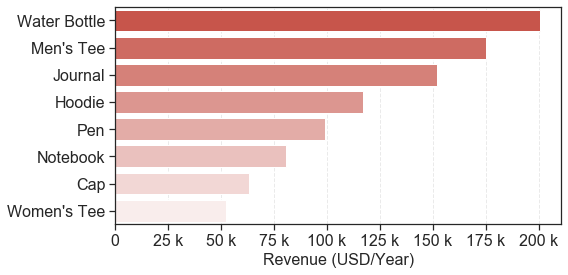

In [46]:
bars = TopRevenueCS.name2
y_pos = np.arange(len(bars))

plt.figure(figsize = (8, 4))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = TopRevenueCS.revenue, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 8, reverse=True))
plt.yticks(y_pos, bars, size = 16)
plt.xticks(size = 16)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Revenue (USD/Year)', size = 16)
plt.ylabel('', size = 16)
ax.xaxis.set_major_formatter(EngFormatter())
plt.show()

##### Quantity

In [47]:
TopQuantityCS = crossSelling.groupby('name2').agg({'quantity': 'sum', 'revenue': 'sum'})

In [48]:
TopQuantityCS = TopRevenuCS.sort_values('quantity', ascending=False).reset_index().head(8)
TopQuantityCS

,name2,quantity,revenue
0,Pen,49574.0,98895.856274
1,Water Bottle,32933.0,200603.064527
2,Journal,19909.0,152036.328026
3,Notebook,13911.0,80850.206589
4,Sunglasses,11049.0,35822.892919
5,Men's Tee,10618.0,174992.342011
6,Sticker,9727.0,20890.791647
7,Shopping Bag,5456.0,21298.034363


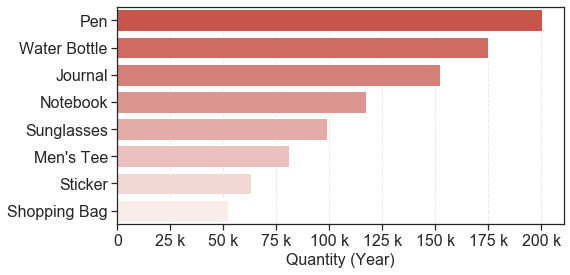

In [49]:
bars = TopQuantityCS.name2
y_pos = np.arange(len(bars))

plt.figure(figsize = (8, 4))
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x = TopRevenueCS.revenue, y = y_pos, orient = 'h', palette = sns.light_palette(redg, 8, reverse=True))
plt.yticks(y_pos, bars, size = 16)
plt.xticks(size = 16)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "x")
plt.xlabel('Quantity (Year)', size = 16)
plt.ylabel('', size = 16)
ax.xaxis.set_major_formatter(EngFormatter())
plt.show()

##### Market Basket Analysis - name2 (grouped)

In [50]:
basket_setG = crossSelling.groupby(['transactionId', 'name2']).agg({'quantity': 'sum'})
basket_setG = basket_setG.reset_index()

In [51]:
basket_setG = basket_setG.pivot(index = 'transactionId', columns = 'name2', values = 'quantity')
basket_setG.head()

name2,Adult Tee,Baby Set,Backpack,Badge Holder,Baseball Raglan,Bib,Cap,Charger,Cooler,Crayon,...,Women's Pullover,Women's Short Sleeve,Women's Tank,Women's Tee,Women's Vest,Womens 3/4 Sleeve,Yoga Block,Yoga Pants,Youth Short Sleeve,Youth Tee
transactionId,,,,,,,,,,,,,,,,,,,,,
ORD2016080112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
basket_setG['product'] = basket_setG.count(axis = 1)
basket_setG.head()

name2,Adult Tee,Baby Set,Backpack,Badge Holder,Baseball Raglan,Bib,Cap,Charger,Cooler,Crayon,...,Women's Short Sleeve,Women's Tank,Women's Tee,Women's Vest,Womens 3/4 Sleeve,Yoga Block,Yoga Pants,Youth Short Sleeve,Youth Tee,product
transactionId,,,,,,,,,,,,,,,,,,,,,
ORD2016080112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [53]:
differProduct = basket_setG.reset_index()['product'].value_counts().reset_index()
differProduct

,index,product
0,1,5173
1,2,2640
2,3,1480
3,4,849
4,5,505
5,6,311
6,7,204
7,8,117
8,9,81
9,10,51


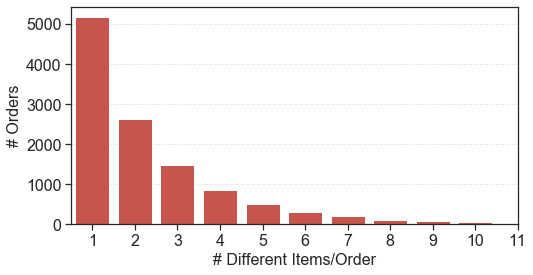

In [54]:
plt.figure(figsize = (8, 4))
sns.set(style="ticks", color_codes=True)
sns.barplot(x = 'index', y = 'product', data = differProduct, color = redg)
plt.yticks(size = 16)
plt.xticks(size = 16)
plt.xlim(None, 10)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
plt.xlabel('# Different Items/Order', size = 16)
plt.ylabel('# Orders', size = 16)
plt.show()

In [55]:
basket_setG.shape

(11508, 89)

In [56]:
basket_setG = basket_setG[basket_setG['product'] > 1]
basket_setG.shape

(6335, 89)

In [57]:
basket_setG = basket_setG.dropna(axis = 1, how ='all')
basket_setG.shape

(6335, 89)

In [58]:
basket_setG = basket_setG.drop('product', 1)
basket_setG.shape

(6335, 88)

In [59]:
basket_setG[basket_setG > 0] = 1
basket_setG = basket_setG.fillna(0)
basket_setG.head()

name2,Adult Tee,Baby Set,Backpack,Badge Holder,Baseball Raglan,Bib,Cap,Charger,Cooler,Crayon,...,Women's Pullover,Women's Short Sleeve,Women's Tank,Women's Tee,Women's Vest,Womens 3/4 Sleeve,Yoga Block,Yoga Pants,Youth Short Sleeve,Youth Tee
transactionId,,,,,,,,,,,,,,,,,,,,,
ORD20160801436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORD20160801443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ORD20160801467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORD20160801502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORD20160801510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# https://pbpython.com/market-basket-analysis.html
# https://towardsdatascience.com/market-basket-analysis-978ac064d8c6

In [61]:
frequent_itemsets = apriori(basket_setG, min_support=0.05, use_colnames=True)

In [62]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Men's Tee),(Hoodie),0.372060,0.119495,0.055564,0.149342,1.249781,0.011105,1.035088
1,(Hoodie),(Men's Tee),0.119495,0.372060,0.055564,0.464993,1.249781,0.011105,1.173705
2,(Journal),(Pen),0.150908,0.236464,0.071507,0.473849,2.003896,0.035823,1.451174
3,(Pen),(Journal),0.236464,0.150908,0.071507,0.302403,2.003896,0.035823,1.217168
4,(Water Bottle),(Journal),0.299290,0.150908,0.064404,0.215190,1.425971,0.019239,1.081908
5,(Journal),(Water Bottle),0.150908,0.299290,0.064404,0.426778,1.425971,0.019239,1.222407
6,(Men's Tee),(Women's Tee),0.372060,0.186582,0.108603,0.291896,1.564437,0.039183,1.148727
7,(Women's Tee),(Men's Tee),0.186582,0.372060,0.108603,0.582064,1.564437,0.039183,1.502480
8,(Water Bottle),(Notebook),0.299290,0.109392,0.053354,0.178270,1.629640,0.020614,1.083820
9,(Notebook),(Water Bottle),0.109392,0.299290,0.053354,0.487734,1.629640,0.020614,1.367866


##### Market Basket Analysis - name (not grouped)

In [63]:
basket_set = crossSelling.groupby(['transactionId', 'name']).agg({'quantity': 'sum'})
basket_set = basket_set.reset_index()

In [64]:
basket_set = basket_set.pivot(index = 'transactionId', columns = 'name', values = 'quantity')
basket_set.head()

name,1 oz Hand Sanitizer,16 oz. Hot and Cold Tumbler,16 oz. Hot/Cold Tumbler,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz Mini Mountain Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz USA Made Aluminum Bottle,24 oz YouTube Sergeant Stripe Bottle,...,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's S/S Crew Tee,YouTube Women's Short Sleeve Crew Tee,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
transactionId,,,,,,,,,,,,,,,,,,,,,
ORD2016080112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD20160801401,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
basket_set['product'] = basket_set.count(axis = 1)
basket_set.head()

name,1 oz Hand Sanitizer,16 oz. Hot and Cold Tumbler,16 oz. Hot/Cold Tumbler,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz Mini Mountain Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz USA Made Aluminum Bottle,24 oz YouTube Sergeant Stripe Bottle,...,YouTube Women's Racer Back Tank Black,YouTube Women's S/S Crew Tee,YouTube Women's Short Sleeve Crew Tee,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red,product
transactionId,,,,,,,,,,,,,,,,,,,,,
ORD2016080112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ORD20160801401,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [66]:
differProduct = basket_set.reset_index()['product'].value_counts().reset_index()
differProduct.head()

,index,product
0,1,4519
1,2,2484
2,3,1535
3,4,978
4,5,618


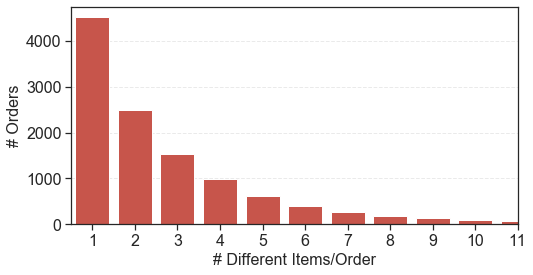

In [67]:
plt.figure(figsize = (8, 4))
sns.set(style="ticks", color_codes=True)
sns.barplot(x = 'index', y = 'product', data = differProduct, color = redg)
plt.yticks(size = 16)
plt.xticks(size = 16)
plt.xlim(None, 10)
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
plt.xlabel('# Different Items/Order', size = 16)
plt.ylabel('# Orders', size = 16)
plt.show()

In [68]:
basket_set.shape

(11508, 491)

In [69]:
basket_set = basket_set[basket_set['product'] > 1]
basket_set.shape

(6989, 491)

In [70]:
basket_set = basket_set.dropna(axis = 1, how ='all')
basket_set.shape

(6989, 491)

In [71]:
basket_set = basket_set.drop('product', 1)
basket_set.shape

(6989, 490)

In [72]:
basket_set[basket_set > 0] = 1
basket_set = basket_set.fillna(0)

In [73]:
frequent_itemsets = apriori(basket_set, min_support=0.01, use_colnames=True)

In [74]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22 oz Android Bottle),(Google 22 oz Water Bottle),0.024753,0.071970,0.011160,0.450867,6.264632,0.009379,1.689991
1,(Google 22 oz Water Bottle),(22 oz Android Bottle),0.071970,0.024753,0.011160,0.155070,6.264632,0.009379,1.154233
2,(8 pc Android Sticker Sheet),(Google Laptop and Cell Phone Stickers),0.031335,0.107455,0.012734,0.406393,3.781995,0.009367,1.503596
3,(Google Laptop and Cell Phone Stickers),(8 pc Android Sticker Sheet),0.107455,0.031335,0.012734,0.118509,3.781995,0.009367,1.098893
4,(Google Laptop and Cell Phone Stickers),(Android Sticker Sheet Ultra Removable),0.107455,0.029475,0.015453,0.143808,4.879009,0.012286,1.133537
5,(Android Sticker Sheet Ultra Removable),(Google Laptop and Cell Phone Stickers),0.029475,0.107455,0.015453,0.524272,4.879009,0.012286,1.876167
6,(Google 22 oz Water Bottle),(Google Laptop and Cell Phone Stickers),0.071970,0.107455,0.013164,0.182903,1.702139,0.005430,1.092337
7,(Google Laptop and Cell Phone Stickers),(Google 22 oz Water Bottle),0.107455,0.071970,0.013164,0.122503,1.702139,0.005430,1.057588
8,(Google Sunglasses),(Google 22 oz Water Bottle),0.071255,0.071970,0.013450,0.188755,2.622682,0.008321,1.143957
9,(Google 22 oz Water Bottle),(Google Sunglasses),0.071970,0.071255,0.013450,0.186879,2.622682,0.008321,1.142198


***